### EURUSD

In [13]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [14]:
eurusd_1 = pd.read_csv("data/EURUSD1.CSV")
eurusd_1.head()

,2024-06-11 00:33\t1.07618\t1.07623\t1.07618\t1.07618\t82
0,2024-06-11 00:34\t1.07619\t1.07621\t1.07616\t1...
1,2024-06-11 00:35\t1.07619\t1.07621\t1.07616\t1...
2,2024-06-11 00:36\t1.07619\t1.07626\t1.07619\t1...
3,2024-06-11 00:37\t1.07624\t1.07624\t1.07622\t1...
4,2024-06-11 00:38\t1.07624\t1.07626\t1.07622\t1...


In [15]:
if len(eurusd_1.columns) == 1:
    eurusd_1 = eurusd_1[eurusd_1.columns[0]].str.split('\t', expand=True)

In [16]:
# Standardize column names
eurusd_1.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [17]:
eurusd_1.head()

,DateTime,Open,High,Low,Close,Volume
0,2024-06-11 00:34,1.07619,1.07621,1.07616,1.07620,109
1,2024-06-11 00:35,1.07619,1.07621,1.07616,1.07621,55
2,2024-06-11 00:36,1.07619,1.07626,1.07619,1.07623,54
3,2024-06-11 00:37,1.07624,1.07624,1.07622,1.07623,110
4,2024-06-11 00:38,1.07624,1.07626,1.07622,1.07623,75


#### Data cleaning

Convert to datetime

In [18]:
# Convert DateTime column to datetime
eurusd_1['DateTime'] = pd.to_datetime(eurusd_1['DateTime'])

In [19]:
eurusd_1.head()

,DateTime,Open,High,Low,Close,Volume
0,2024-06-11 00:34:00,1.07619,1.07621,1.07616,1.07620,109
1,2024-06-11 00:35:00,1.07619,1.07621,1.07616,1.07621,55
2,2024-06-11 00:36:00,1.07619,1.07626,1.07619,1.07623,54
3,2024-06-11 00:37:00,1.07624,1.07624,1.07622,1.07623,110
4,2024-06-11 00:38:00,1.07624,1.07626,1.07622,1.07623,75


In [20]:
# Sort by DateTime
eurusd_1 = eurusd_1.sort_values('DateTime').reset_index(drop=True)

In [21]:
eurusd_1.head()

,DateTime,Open,High,Low,Close,Volume
0,2024-06-11 00:34:00,1.07619,1.07621,1.07616,1.07620,109
1,2024-06-11 00:35:00,1.07619,1.07621,1.07616,1.07621,55
2,2024-06-11 00:36:00,1.07619,1.07626,1.07619,1.07623,54
3,2024-06-11 00:37:00,1.07624,1.07624,1.07622,1.07623,110
4,2024-06-11 00:38:00,1.07624,1.07626,1.07622,1.07623,75


Convert numeric columns to float


In [24]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    eurusd_1[col] = pd.to_numeric(eurusd_1[col], errors='coerce')


Handle Missing values

In [26]:
# Check for missing values
missing_values = eurusd_1.isnull().sum()
missing_values

DateTime    0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

In [28]:
# Exploratory Data Analysis
eurusd_1.describe()

,DateTime,Open,High,Low,Close,Volume
count,195543,195543.000000,195543.000000,195543.000000,195543.000000,195543.000000
mean,2024-09-16 10:39:16.669888256,1.083573,1.083634,1.083511,1.083572,179.049524
min,2024-06-11 00:34:00,1.033960,1.034660,1.033250,1.033980,1.000000
25%,2024-07-30 03:40:30,1.070560,1.070610,1.070510,1.070550,60.000000
50%,2024-09-17 02:48:00,1.084680,1.084730,1.084620,1.084680,128.000000
75%,2024-11-05 01:48:30,1.101270,1.101310,1.101240,1.101270,234.000000
max,2024-12-23 16:59:00,1.121220,1.121400,1.121070,1.121220,4376.000000
std,NaN,0.021176,0.021168,0.021184,0.021176,182.381894


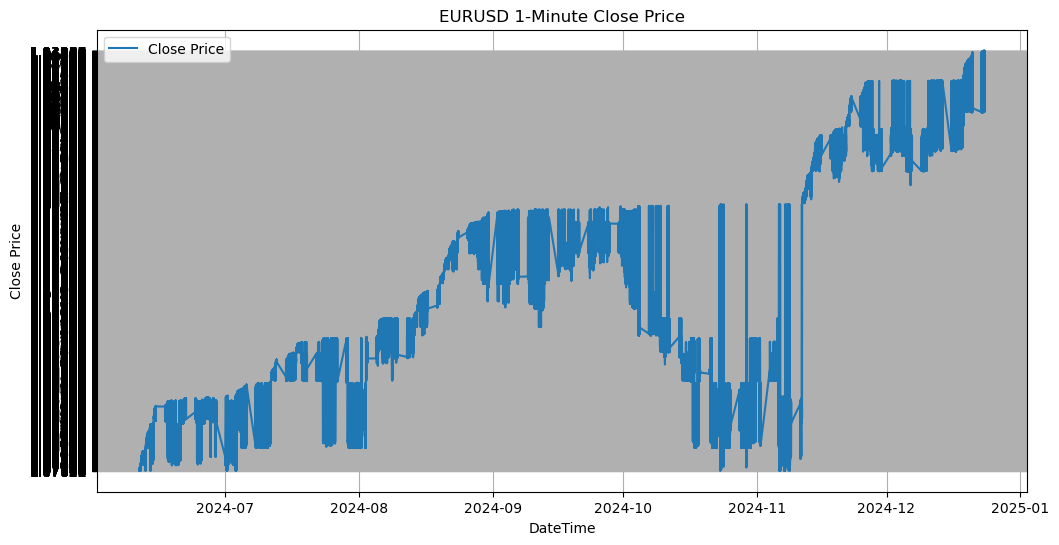

In [23]:
# Visualize Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(eurusd_1['DateTime'], eurusd_1['Close'], label='Close Price')
plt.title('EURUSD 1-Minute Close Price')
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

#### Feature engineering

In [29]:
# Feature Engineering
def calculate_features(df):
    # Moving Averages
    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['SMA_15'] = df['Close'].rolling(window=15).mean()

    # RSI Calculation
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    return df

In [30]:
eurusd_15m = calculate_features(eurusd_1)

# Display with new features
print(eurusd_15m[['DateTime', 'Close', 'SMA_5', 'RSI_14']].tail())

                  DateTime    Close     SMA_5     RSI_14
195538 2024-12-23 16:55:00  1.04080  1.040632  58.333333
195539 2024-12-23 16:56:00  1.04081  1.040642  55.665025
195540 2024-12-23 16:57:00  1.04094  1.040724  50.549451
195541 2024-12-23 16:58:00  1.04072  1.040754  49.197861
195542 2024-12-23 16:59:00  1.04077  1.040808  58.787879


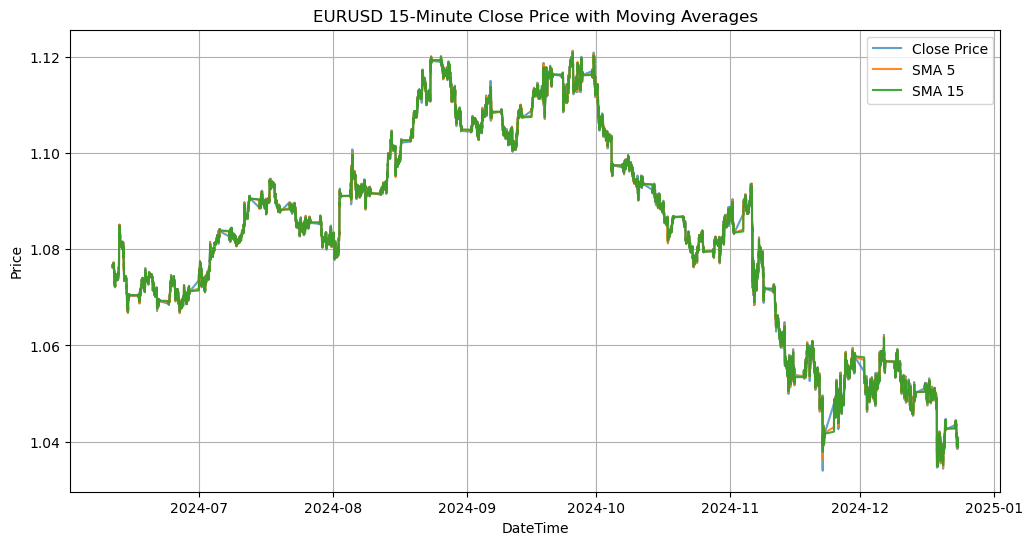

In [31]:
# Plot Close Prices and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(eurusd_1['DateTime'], eurusd_1['Close'], label='Close Price', alpha=0.7)
plt.plot(eurusd_1['DateTime'], eurusd_1['SMA_5'], label='SMA 5', alpha=0.9)
plt.plot(eurusd_1['DateTime'], eurusd_1['SMA_15'], label='SMA 15', alpha=0.9)
plt.title('EURUSD 15-Minute Close Price with Moving Averages')
plt.xlabel('DateTime')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [32]:
# Check for missing values
missing_values_1 = eurusd_1.isnull().sum()
missing_values_1

DateTime     0
Open         0
High         0
Low          0
Close        0
Volume       0
SMA_5        4
SMA_15      14
RSI_14      42
dtype: int64